# Find Top 20 Most Profitable Movies

In [1]:
import pandas as pd
import numpy as np
import requests as rq
import sqlite3
from sklearn.preprocessing import OneHotEncoder
from zipfile import ZipFile
import tarfile
import gzip
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Bom Movie Data
with gzip.open("zippedData/bom.movie_gross.csv.gz", "rb") as f:
    bom_movie_gross = pd.read_csv(f)

# IMDB Name Data    
with gzip.open("zippedData/imdb.name.basics.csv.gz", "rb") as f:
    imdb_name_basics = pd.read_csv(f)

with gzip.open("zippedData/imdb.title.akas.csv.gz", "rb") as f:
    imdb_title_akas = pd.read_csv(f)

with gzip.open("zippedData/imdb.title.basics.csv.gz", "rb") as f:
    imdb_title_basics = pd.read_csv(f)

with gzip.open("zippedData/imdb.title.crew.csv.gz", "rb") as f:
    imdb_title_crew = pd.read_csv(f)
    
with gzip.open("zippedData/imdb.title.principals.csv.gz", "rb") as f:
    imdb_title_principals = pd.read_csv(f)

with gzip.open("zippedData/imdb.title.ratings.csv.gz", "rb") as f:
    imdb_title_ratings = pd.read_csv(f)

# Rotten Tomatoes Movie Data
with gzip.open("zippedData/rt.movie_info.tsv.gz", "rb") as f:
    rt_movie_info = pd.read_csv(f, sep="\t", encoding='latin1')
    
with gzip.open("zippedData/rt.reviews.tsv.gz", "rb") as f:
    rt_reviews = pd.read_csv(f, sep="\t", encoding='latin1')

# TMDB Movie Data
with gzip.open("zippedData/tmdb.movies.csv.gz", "rb") as f:
    tmdb_movies = pd.read_csv(f)

# TN Movie Data
with gzip.open("zippedData/tn.movie_budgets.csv.gz", "rb") as f:
    tn_movie_budgets = pd.read_csv(f)

In [3]:
#Rename dataframe & remove dollar sign and commas from each column
df = tn_movie_budgets
df['production_budget'] = df['production_budget'].str.replace(',','')
df['production_budget'] = df['production_budget'].str.replace('$','')
df['domestic_gross'] = df['domestic_gross'].str.replace(',','')
df['domestic_gross'] = df['domestic_gross'].str.replace('$','')
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',','')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$','')

In [4]:
#Reformat monetary amount from object to integer
df['production_budget'] = df['production_budget'].astype(int)
df['domestic_gross'] = df['domestic_gross'].astype(int)
df['worldwide_gross'] = df['worldwide_gross'].astype(int)

In [5]:
#Make new column 'profit' and new list of movies with the 20 highest profits
df['profit'] = df['worldwide_gross']-df['production_budget']
df_prof_sorted = df.sort_values('profit', ascending = False)
df_top_20_prof = df_prof_sorted[0:20]
list_top_20 = list(df_top_20_prof['movie'])
list_top_20

['Avatar',
 'Titanic',
 'Avengers: Infinity War',
 'Star Wars Ep. VII: The Force Awakens',
 'Jurassic World',
 'Furious 7',
 'The Avengers',
 'Harry Potter and the Deathly Hallows: Part II',
 'Black Panther',
 'Jurassic World: Fallen Kingdom',
 'Frozen',
 'Beauty and the Beast',
 'Minions',
 'Avengers: Age of Ultron',
 'The Lord of the Rings: The Return of the King',
 'Incredibles 2',
 'Iron Man 3',
 'Star Wars Ep. VIII: The Last Jedi',
 'Aquaman',
 'The Fate of the Furious']

In [7]:
#Manually sort from the top 20 list into 4 categories
franchise_sequel = ['Avengers: Infinity War', 'Star Wars Ep. VII: The Force Awakens', 'Jurassic World', 'Furious 7', 'Harry Potter and the Deathly Hallows: Part II','Jurassic World: Fallen Kingdom', 'Minions','Avengers: Age of Ultron','The Lord of the Rings: The Return of the King','Incredibles 2','Iron Man 3','Star Wars Ep. VIII: The Last Jedi','The Fate of the Furious']
franchise_original = ['Avatar', 'The Avengers', 'Black Panther', 'Frozen', 'Aquaman']
remake = ['Beauty and the Beast']
stand_alone = ['Titanic']

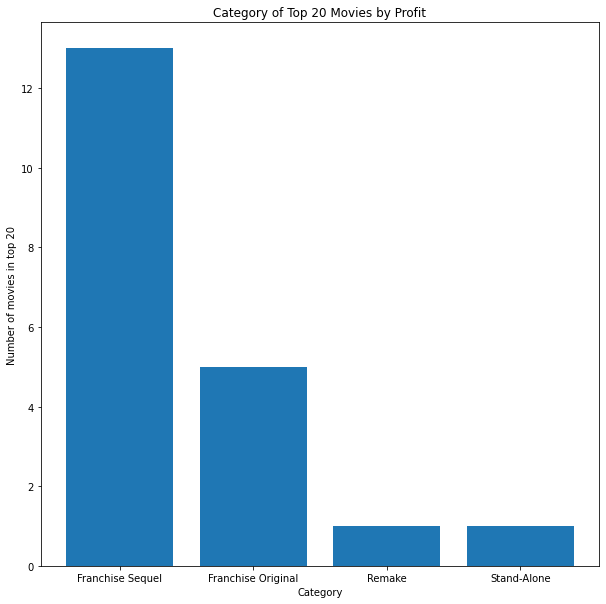

In [8]:
#Plot how many of the top 20 profiting movies are in each category
fig, ax = plt.subplots(figsize = (10,10))

x = ['Franchise Sequel', 'Franchise Original', 'Remake', 'Stand-Alone']
y = [len(franchise_sequel), len(franchise_original), len(remake), len(stand_alone)]
ax.bar(x,y)
ax.set_title('Category of Top 20 Movies by Profit')
ax.set_ylabel('Number of movies in top 20')
ax.set_xlabel('Category');